# 0. Install and Import Dependencies

In [59]:
!pip install mediapipe opencv-python

In [60]:
import cv2
import mediapipe as mp
import numpy as np
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

In [61]:
import cv2

# Path to your video file
cap = cv2.VideoCapture('C:\\Users\\kvsab\\OneDrive\\Documents\\POSE AI HACKATHON\\MediaPipePoseEstimation-main\\WhatsApp Video 2024-09-18 at 10.18.25_34154a2d.mp4')

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    
    # Display the video feed
    cv2.imshow('Dataset Video Feed', frame)
    
    # Press 'q' to exit the video
    if cv2.waitKey(5) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


# 1. Make Detections

In [62]:
import cv2
import mediapipe as mp

# Initialize Mediapipe pose detection and drawing utilities
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

# Path to the single video file
video_path = r'C:\Users\kvsab\Downloads\POSE AI HACKATHON\MediaPipePoseEstimation-main\WhatsApp Video 2024-09-18 at 10.18.25_34154a2d.mp4'

# Open the video file
cap = cv2.VideoCapture(video_path)

# Setup Mediapipe pose instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Recolor image to RGB for Mediapipe
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        
        # Make pose detection
        results = pose.process(image)
        
        # Recolor image back to BGR for OpenCV
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract landmarks and print them
        try:
            landmarks = results.pose_landmarks.landmark
            print(landmarks)
        except:
            pass
        
        # Render pose landmarks on the video
        if results.pose_landmarks:
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                      mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=2),
                                      mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2))
        
        # Display the video feed with pose landmarks
        cv2.imshow('Mediapipe Feed', image)

        # Press 'q' to exit the video
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()


[x: 0.707402587
y: 0.44331798
z: -0.02320881
visibility: 0.999312639
, x: 0.710643589
y: 0.432397425
z: -0.0351167284
visibility: 0.999289393
, x: 0.711680472
y: 0.432291061
z: -0.0351379104
visibility: 0.999398232
, x: 0.712747
y: 0.432092458
z: -0.0351272114
visibility: 0.999498844
, x: 0.710078061
y: 0.432358772
z: -0.0145401256
visibility: 0.998903155
, x: 0.710609496
y: 0.432185382
z: -0.0145192435
visibility: 0.998741925
, x: 0.711176634
y: 0.431859374
z: -0.0145322587
visibility: 0.998864412
, x: 0.720875442
y: 0.4357301
z: -0.0656205714
visibility: 0.999354541
, x: 0.718641639
y: 0.434951484
z: 0.0261767749
visibility: 0.996866286
, x: 0.710578322
y: 0.451777756
z: -0.0326833613
visibility: 0.998963594
, x: 0.709607244
y: 0.451849133
z: -0.0061054253
visibility: 0.99794811
, x: 0.731067359
y: 0.480380565
z: -0.1251252
visibility: 0.999974251
, x: 0.729135215
y: 0.488171
z: 0.0865508616
visibility: 0.997300327
, x: 0.728074908
y: 0.561285615
z: -0.167684466
visibility: 0.9957106

In [63]:
mp_drawing.DrawingSpec??

Init signature:
mp_drawing.DrawingSpec(
    color: Tuple[int, int, int] = (224, 224, 224),
    thickness: int = 2,
    circle_radius: int = 2,
) -> None
Docstring:      DrawingSpec(color: Tuple[int, int, int] = (224, 224, 224), thickness: int = 2, circle_radius: int = 2)
Source:        
@dataclasses.dataclass
class DrawingSpec:
  # Color for drawing the annotation. Default to the white color.
  color: Tuple[int, int, int] = WHITE_COLOR
  # Thickness for drawing the annotation. Default to 2 pixels.
  thickness: int = 2
  # Circle radius. Default to 2 pixels.
  circle_radius: int = 2
File:           c:\users\kvsab\appdata\local\programs\python\python312\lib\site-packages\mediapipe\python\solutions\drawing_utils.py
Type:           type
Subclasses:     

# 2. Determining Joints

<img src="https://i.imgur.com/3j8BPdc.png" style="height:300px" >

In [64]:
import cv2
import mediapipe as mp

# Initialize Mediapipe pose detection and drawing utilities
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

# Path to the single video file
video_path = r'C:\Users\kvsab\Downloads\POSE AI HACKATHON\MediaPipePoseEstimation-main\WhatsApp Video 2024-09-18 at 10.18.25_34154a2d.mp4'

# Open the video file
cap = cv2.VideoCapture(video_path)

# Setup Mediapipe pose instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        
        # Recolor image to RGB for Mediapipe
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False

        # Make detection
        results = pose.process(image)

        # Recolor back to BGR for OpenCV
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark
            print(landmarks)
        except:
            pass

        # Render detections
        mp_drawing.draw_landmarks(
            image, 
            results.pose_landmarks, 
            mp_pose.POSE_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=2), 
            mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)
        )

        # Display the video feed with pose landmarks
        cv2.imshow('Mediapipe Feed', image)

        # Press 'q' to exit the video
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()


[x: 0.707402587
y: 0.44331798
z: -0.02320881
visibility: 0.999312639
, x: 0.710643589
y: 0.432397425
z: -0.0351167284
visibility: 0.999289393
, x: 0.711680472
y: 0.432291061
z: -0.0351379104
visibility: 0.999398232
, x: 0.712747
y: 0.432092458
z: -0.0351272114
visibility: 0.999498844
, x: 0.710078061
y: 0.432358772
z: -0.0145401256
visibility: 0.998903155
, x: 0.710609496
y: 0.432185382
z: -0.0145192435
visibility: 0.998741925
, x: 0.711176634
y: 0.431859374
z: -0.0145322587
visibility: 0.998864412
, x: 0.720875442
y: 0.4357301
z: -0.0656205714
visibility: 0.999354541
, x: 0.718641639
y: 0.434951484
z: 0.0261767749
visibility: 0.996866286
, x: 0.710578322
y: 0.451777756
z: -0.0326833613
visibility: 0.998963594
, x: 0.709607244
y: 0.451849133
z: -0.0061054253
visibility: 0.99794811
, x: 0.731067359
y: 0.480380565
z: -0.1251252
visibility: 0.999974251
, x: 0.729135215
y: 0.488171
z: 0.0865508616
visibility: 0.997300327
, x: 0.728074908
y: 0.561285615
z: -0.167684466
visibility: 0.9957106

In [65]:
len(landmarks)

33

In [66]:
for lndmrk in mp_pose.PoseLandmark:
    print(lndmrk)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32


In [67]:
landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].visibility

0.9983515739440918

In [68]:
landmarks[mp_pose.PoseLandmark.LEFT_HIP.value]

x: 0.716546834
y: 0.626088858
z: -0.0613712743
visibility: 0.999607861

In [69]:
landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value]

x: 0.718290567
y: 0.731310248
z: -0.0640582
visibility: 0.941754

In [70]:
landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value]

x: 0.722375214
y: 0.734059811
z: 0.0974852592
visibility: 0.446144342

In [71]:
landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value]

x: 0.716084361
y: 0.852341652
z: -0.0554273166
visibility: 0.983945906

In [72]:
landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value]

x: 0.750396609
y: 0.827742
z: 0.144883856
visibility: 0.702925

In [73]:
landmarks[mp_pose.PoseLandmark.LEFT_HEEL.value]

x: 0.722024858
y: 0.87019515
z: -0.0581339374
visibility: 0.971619785

In [74]:
landmarks[mp_pose.PoseLandmark.RIGHT_HEEL.value]

x: 0.7583
y: 0.845429
z: 0.148235694
visibility: 0.8037287

In [75]:
landmarks[mp_pose.PoseLandmark.LEFT_FOOT_INDEX.value]

x: 0.68954283
y: 0.870122135
z: -0.113700598
visibility: 0.98067981

In [76]:
landmarks[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX.value]

x: 0.729302585
y: 0.850760281
z: 0.1259799
visibility: 0.837704599

# 3. Calculate Angles

In [77]:
def calculate_angle(a,b,c):
    a = np.array(a) # First
    b = np.array(b) # Mid
    c = np.array(c) # End
    
    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)
    
    if angle >180.0:
        angle = 360-angle
        
    return angle 

In [78]:
hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y]
foot = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.LEFT_HEEL.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.LEFT_HEEL.value].y]

In [79]:
hip, knee, foot

([0.7165468335151672, 0.6284708380699158],
 [0.7182905673980713, 0.7340598106384277],
 [0.7220248579978943, 0.8701951503753662])

In [80]:
calculate_angle(hip,knee,foot)

np.float64(179.37484634106977)

In [105]:
tuple(np.multiply(hip, [640, 480]).astype(int))
tuple(np.multiply(knee, [640, 480]).astype(int))
tuple(np.multiply(foot, [640, 480]).astype(int))

(np.int64(460), np.int64(404))

In [109]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt

# Initialize Mediapipe pose detection and drawing utilities
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

# Function to calculate the angle between three points
def calculate_angle(a, b, c):
    a = np.array(a)  # First point
    b = np.array(b)  # Mid point
    c = np.array(c)  # End point

    # Calculate angle
    radians = np.arctan2(c[1] - b[1], c[0] - b[0]) - np.arctan2(a[1] - b[1], a[0] - b[0])
    angle = np.abs(radians * 180.0 / np.pi)

    # Adjust angle to be between 0 and 180 degrees
    if angle > 180.0:
        angle = 360 - angle

    return angle

# Path to the video file
video_path = r'C:\Users\kvsab\Downloads\POSE AI HACKATHON\MediaPipePoseEstimation-main\WhatsApp Video 2024-09-18 at 10.18.25_34154a2d.mp4'

# Open the video file
cap = cv2.VideoCapture(video_path)

# Lists to store the angle values for graphing
hip_angles = []
knee_angles = []
foot_angles = []
frame_indices = []

frame_counter = 0

# Setup Mediapipe pose instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        
        # Recolor image to RGB for Mediapipe
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False

        # Make detection
        results = pose.process(image)

        # Recolor back to BGR for OpenCV
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # Extract landmarks and calculate angles
        try:
            landmarks = results.pose_landmarks.landmark
            
            # Get coordinates of left hip, left knee, and left ankle (foot)
            hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x, 
                   landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
            knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x, 
                    landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
            foot = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x, 
                    landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]
            
            # Calculate the angles at hip, knee, and foot
            hip_angle = calculate_angle(hip, knee, foot)  # Angle at the hip
            knee_angle = calculate_angle(hip, knee, foot)  # Angle at the knee
            foot_angle = calculate_angle(knee, foot, [foot[0], foot[1] + 0.1])  # Angle at the foot (approximation)

            # Append angles and frame count for plotting
            hip_angles.append(hip_angle)
            knee_angles.append(knee_angle)
            foot_angles.append(foot_angle)
            frame_indices.append(frame_counter)
            frame_counter += 1

            # Visualize angle on video feed for hip, knee, and foot
            cv2.putText(image, f'Hip: {int(hip_angle)}', 
                        tuple(np.multiply(hip, [frame.shape[1], frame.shape[0]]).astype(int)), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.putText(image, f'Knee: {int(knee_angle)}', 
                        tuple(np.multiply(knee, [frame.shape[1], frame.shape[0]]).astype(int)), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.putText(image, f'Foot: {int(foot_angle)}', 
                        tuple(np.multiply(foot, [frame.shape[1], frame.shape[0]]).astype(int)), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
            
        except Exception as e:
            pass

        # Render detections
        if results.pose_landmarks:
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                    mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=2), 
                                    mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)
                                    )
        
        # Display the video feed with pose landmarks
        cv2.imshow('Mediapipe Feed', image)

        # Press 'q' to exit the video
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()



Time: 0.21 s, Combined Angle: 179.10°
Time: 0.29 s, Combined Angle: 178.38°
Time: 0.33 s, Combined Angle: 178.27°
Time: 0.37 s, Combined Angle: 178.36°
Time: 0.42 s, Combined Angle: 178.44°
Time: 0.47 s, Combined Angle: 178.88°
Time: 0.51 s, Combined Angle: 178.91°
Time: 0.56 s, Combined Angle: 179.12°
Time: 0.61 s, Combined Angle: 179.47°
Time: 0.65 s, Combined Angle: 179.44°
Time: 0.70 s, Combined Angle: 179.05°
Time: 0.75 s, Combined Angle: 179.32°
Time: 0.80 s, Combined Angle: 179.44°
Time: 0.84 s, Combined Angle: 179.30°
Time: 0.88 s, Combined Angle: 179.29°
Time: 0.93 s, Combined Angle: 179.22°
Time: 0.98 s, Combined Angle: 178.98°
Time: 1.02 s, Combined Angle: 178.63°
Time: 1.07 s, Combined Angle: 178.26°
Time: 1.11 s, Combined Angle: 178.24°
Time: 1.16 s, Combined Angle: 178.23°
Time: 1.21 s, Combined Angle: 178.20°
Time: 1.26 s, Combined Angle: 178.13°
Time: 1.30 s, Combined Angle: 178.10°
Time: 1.35 s, Combined Angle: 178.04°
Time: 1.40 s, Combined Angle: 178.04°
Time: 1.45 s

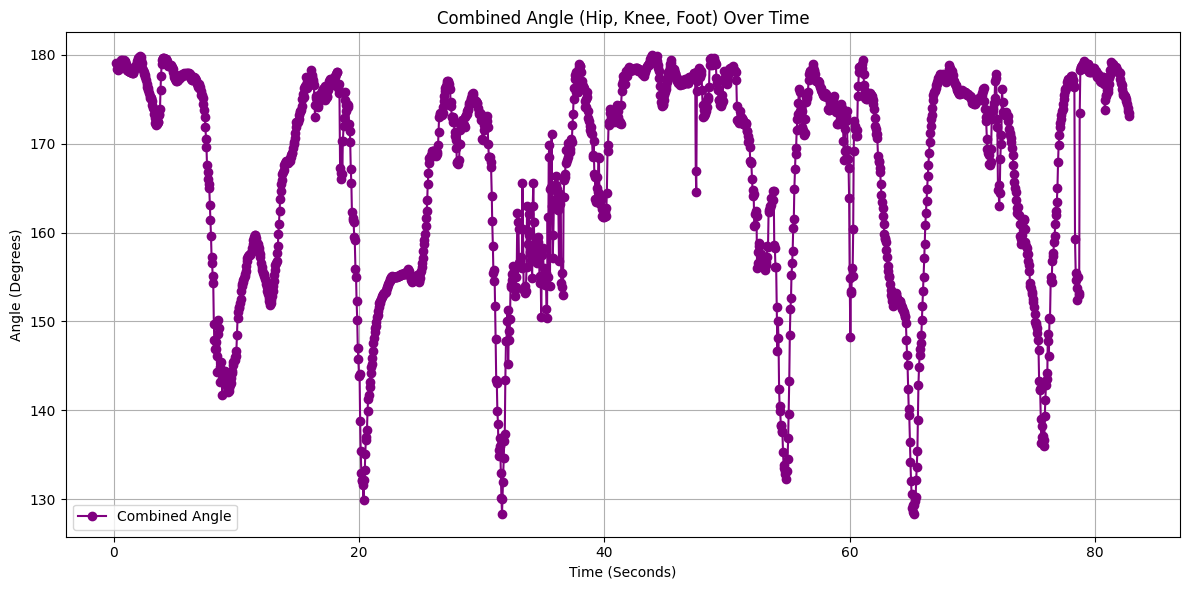

In [118]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt

# Initialize Mediapipe pose detection and drawing utilities
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

# Function to calculate the angle between three points
def calculate_angle(a, b, c):
    a = np.array(a)  # First point
    b = np.array(b)  # Mid point
    c = np.array(c)  # End point

    # Calculate angle
    radians = np.arctan2(c[1] - b[1], c[0] - b[0]) - np.arctan2(a[1] - b[1], a[0] - b[0])
    angle = np.abs(radians * 180.0 / np.pi)

    # Adjust angle to be between 0 and 180 degrees
    if angle > 180.0:
        angle = 360 - angle

    return angle

# Path to the video file
video_path = r'C:\Users\kvsab\Downloads\POSE AI HACKATHON\MediaPipePoseEstimation-main\WhatsApp Video 2024-09-18 at 10.18.25_34154a2d.mp4'

# Open the video file
cap = cv2.VideoCapture(video_path)

# Lists to store the combined angle values and time for graphing
combined_angles = []
time_stamps = []

frame_counter = 0
start_time = cv2.getTickCount() / cv2.getTickFrequency()  # Get the start time of video processing

# Setup Mediapipe pose instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        
        # Recolor image to RGB for Mediapipe
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False

        # Make detection
        results = pose.process(image)

        # Recolor back to BGR for OpenCV
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # Extract landmarks and calculate angles
        try:
            landmarks = results.pose_landmarks.landmark
            
            # Get coordinates of left hip, left knee, and left ankle (foot)
            hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x, 
                   landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
            knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x, 
                    landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
            foot = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x, 
                    landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]
            
            # Calculate the angles at hip, knee, and foot
            hip_angle = calculate_angle(hip, knee, foot)
            knee_angle = calculate_angle(hip, knee, foot)
            foot_angle = calculate_angle(knee, foot, [foot[0], foot[1] + 0.1])
            
            # Combine the angles into one (average)
            combined_angle = (hip_angle + knee_angle + foot_angle) / 3

            # Calculate the time elapsed in seconds
            current_time = cv2.getTickCount() / cv2.getTickFrequency()
            time_elapsed = current_time - start_time
            
            # Append combined angle and time for plotting
            combined_angles.append(combined_angle)
            time_stamps.append(time_elapsed)

            # Print the timestamp and angle value
            print(f'Time: {time_elapsed:.2f} s, Combined Angle: {combined_angle:.2f}°')

            # Visualize angle on video feed for combined angle
            cv2.putText(image, f'Combined Angle: {int(combined_angle)}', 
                        (50, 50), 
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
        except Exception as e:
            pass

        # Render detections
        if results.pose_landmarks:
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                    mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=2), 
                                    mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)
                                    )
        
        # Display the video feed with pose landmarks
        cv2.imshow('Mediapipe Feed', image)

        # Press 'q' to exit the video
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

# Plotting the combined angle information
plt.figure(figsize=(12, 6))

# Plot combined angle over the time stamps
plt.plot(time_stamps, combined_angles, label='Combined Angle', color='purple', marker='o')

# Adding labels, title, and legend
plt.xlabel('Time (Seconds)')
plt.ylabel('Angle (Degrees)')
plt.title('Combined Angle (Hip, Knee, Foot) Over Time')
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

++++++++++++++++++++